In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from ieee80211phy.util import *
from ieee80211phy.receiver import *
%load_ext autoreload
%autoreload 2

DEBUG:matplotlib.pyplot:Loaded backend nbAgg version unknown.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from numpy import sqrt
from numpy.random import rand, randn
import matplotlib.pyplot as plt
  
N = 5000000
EbNodB_range = range(-12,11)
itr = len(EbNodB_range)
ber = [None]*itr

for n in range (0, itr): 
 
    EbNodB = EbNodB_range[n]   
    EbNo=10.0**(EbNodB/10.0)
    x = 2 * (rand(N) >= 0.5) - 1
    noise_std = 1/sqrt(2*EbNo)
    y = x + noise_std * randn(N)
    y_d = 2 * (y >= 0) - 1
    errors = (x != y_d).sum()
    ber[n] = 1.0 * errors / N
    
    print ("EbNodB:", EbNodB)
    print ("Error bits:", errors)
    print ("Error probability:", ber[n]) 
        

In [ ]:
plt.plot(EbNodB_range, ber, 'bo', EbNodB_range, ber, 'k')
# plt.axis([0, 10, 1e-6, 0.1])
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.grid(True)
plt.title('BPSK Modulation')
plt.show()

In [ ]:
b = Bits('0x001248')

In [ ]:
b

In [ ]:
my_hexdata = '1248'
num_of_bits = int(len(my_hexdata) * np.log2(16))
bb = int_to_binstr(int(my_hexdata, 16), num_of_bits)
print(bb)

bbb = flip_byte_endian(bb)
print(bbb)

In [4]:
bits, iq = default_iee80211_package()

INFO:ieee80211phy.transmitter:Package 100 bytes, 6 OFDM symbols (42 padding bits added)
	 data_rate=36, modulation=16-QAM, coding_rate=3/4


In [8]:
res = receiver(iq[160+32:])

/home/gaspar/git/ieee80211phy/ieee80211phy/receiver.py:70: RuntimeWarning: invalid value encountered in true_divide
  channel_estimate = np.fft.fft(avg_train) / long_training_symbol()
INFO:ieee80211phy.conv_coding:Decoded 24 bits, score=0, rate=1/2
INFO:ieee80211phy.receiver:Package 100 bytes -> 6 OFDM symbols @ 36MB/s (16-QAM, 3/4)
INFO:ieee80211phy.conv_coding:Decoded 864 bits, score=0, rate=3/4


In [10]:
res.bits

'00100000010000000000000001110100000000000000011000010000101100111110110001100101000000000000010001101011100000000011110010001111000000000000011000010000101101011101110011110101000000000000000001010010111101101001111000110100000001000100011001001110100101101110011000010110001011100000010011001110000011101000011001001110110101100000010011110110011001100000010000100110100101100110111010010110011101101001011000101110100111100011010001010000001000101000011010101110111001100001011000101110101001100100111000000100111101100110011000000100101000100011011010011110110011101001011010101110101101100011010001010000011000101001011001001110101001101011010010010110011101101100111010010110010011101010011000100110000001001110111010100110000001000010111001001110101001101000011011100110110011001000010001101101'

In [11]:
bits

'00100000010000000000000001110100000000000000011000010000101100111110110001100101000000000000010001101011100000000011110010001111000000000000011000010000101101011101110011110101000000000000000001010010111101101001111000110100000001000100011001001110100101101110011000010110001011100000010011001110000011101000011001001110110101100000010011110110011001100000010000100110100101100110111010010110011101101001011000101110100111100011010001010000001000101000011010101110111001100001011000101110101001100100111000000100111101100110011000000100101000100011011010011110110011101001011010101110101101100011010001010000011000101001011001001110101001101011010010010110011101101100111010010110010011101010011000100110000001001110111010100110000001000010111001001110101001101000011011100110110011001000010001101101'

In [17]:
diff = len([True for x, y in zip(bits, res.bits) if x != y])
diff

0

In [39]:
logging.disable(logging.INFO)


In [46]:
rates1 = [bit_error_rate(i) for i in range(0, 20)]
rates2 = [bit_error_rate(i) for i in range(0, 20)]
rates3 = [bit_error_rate(i) for i in range(0, 20)]
rates4 = [bit_error_rate(i) for i in range(0, 20)]

<IPython.core.display.Javascript object>


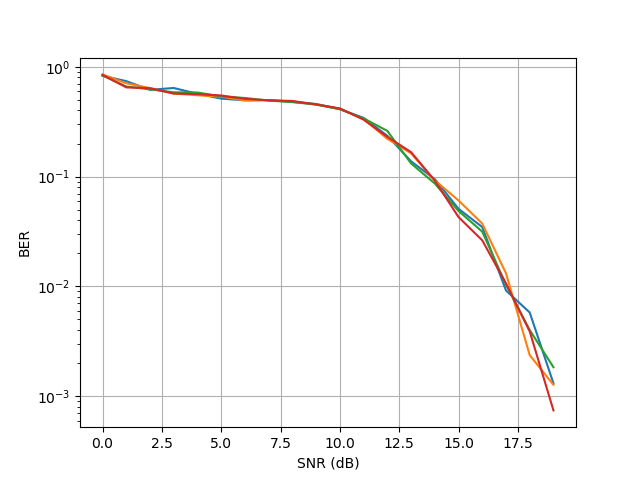

In [47]:
EbNodB_range = range(0, 20)
plt.plot(rates1)
plt.plot(rates2)
plt.plot(rates3)
plt.plot(rates4)
# plt.plot(EbNodB_range, rates1, 'bo', EbNodB_range, rates1, 'k')
# plt.plot(EbNodB_range, rates2, 'bo', EbNodB_range, rates2, 'k')
# plt.plot(EbNodB_range, rates3, 'bo', EbNodB_range, rates3, 'k')
# plt.plot(EbNodB_range, rates4, 'bo', EbNodB_range, rates4, 'k')
# plt.axis([0, 10, 1e-6, 0.1])
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.grid(True)
# plt.title('BPSK Modulation')
plt.show()